In [1]:
from time_series.TimeSeriesSimulator import TimeSeriesSimulator

In [2]:
ts_simulator = TimeSeriesSimulator()
ts_simulator.load_parameters(filename="parameters_set_1.json",
                             path="/home/louis/Documents/codes/ARIMA_Box_Jenkins_method/")

In [3]:
ts_simulator.generate_time_series()

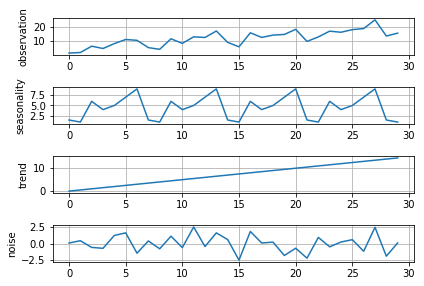

In [4]:
ts_simulator.components.show()

# 1 - Data preparation: Are the observation stationary ?

In [7]:
from statsmodels.tsa.stattools import adfuller

# 2 - Model selection: Do we have correlations in the observations ?

In [9]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf

# 3 - Estimation of parameters

# 4 - Forecasting 

# 5 - Model  analysis

In [8]:
from statsmodels.tools.eval_measures import aic